## Editor di immagini
Per questo esercizio dovrai creare un semplice editor di immagini, andando a scegliere i moduli da utilizzare dal Python Package Index e studiando la loro documentazione. Per la ricerca non ti basare solo su PyPi, Google, StackOverflow e Github sono anche tuoi amici. 

Il programma dovrà chiedere all'utente il percorso ad un'immagine jpg o png, prima di andare avanti il programma deve assicurarsi che l'immagine effettivamente esista (suggerimento, dai uno sguardo al modulo path di os) e che abbia una delle due estensioni accettate, altrimenti deve mostrare un avviso ed uscire.

In seguito, dovrà stampare su schermo:

1. Nome dell'immagine (solo il nome senza il percorso).
2. Estensione dell'immagine (jpg o png).
3. Risoluzione dell'immagine (larghezza x altezza).

Fatto ciò, il programma deve chiedere all'utente se vuole cambiare la risoluzione dell'immagine, l'utente dovrà inserire una risoluzione in formato LARGHEZZAxALTEZZA oppure lasciare vuoto, se lascia vuoto la risoluzione non verrà modificata.

Se le proporzioni della nuova risoluzione sono differenti da quelle originali, allora il programma dovrà chiedere all'utente se vuole mantenerle, in caso positivo bisogna modificare larghezza/altezza inserita dall'utente per mantenere le proporzioni originali.

In seguito il programma dovrà chiedere all'utente se vuole convertire l'immagine in bianco e nero, in caso positivo, dovrà farlo.

Il programma dovrà salvare la nuova immagine nella stessa directory dove si trova l'immagine originale, con il nome NOME_IMMAGINE_ORIGINALE_new.ESTENSIONE.

Infine, il programma dovrà mostrare la nuova immagine su schermo.

Di seguito un esempio di utilizzo del programma.

In [ ]:
#Inserisci il percorso all'immagine: pictures/cat.png

# File: cat.png
# Formato: png
# Risoluzione: 512x512
# Nuova risoluzione: 50x75
# Mantenere le proporzioni? [si/no]: si
# Nuova risoluzione 50x50
# Convertire in bianco e nero? [si/no]: si
# Nuova immagine salvata in pictures//cat_new.png

Ho capito che il package di riferimento è Pillow. 
https://pillow.readthedocs.io/en/latest/handbook/index.html
https://www.kdnuggets.com/2022/11/8-best-python-image-manipulation-tools.html

Inserisci percorso (relativo o assoluto) ad un'immagine: funny_cat.jpg
Nome file: funny_cat
Estensione: .jpg
Risoluzione: 1000x667 pixel
Nuova risoluzione [LARGHEZZAxALTEZZA] - lasciare vuoto per non modificare: 
Convertire in bianco e nero? [si/no] si
Nuova immagine salvata in: funny_cat_new.jpg


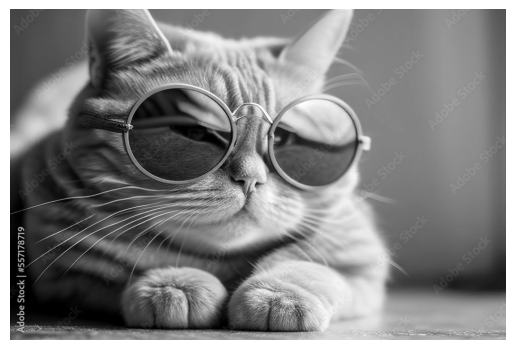

In [5]:
from PIL import Image
import os

#chiedere in input il percorso di img e verificare che esista
img_path = input("Inserisci percorso (relativo o assoluto) ad un'immagine: ")
try:
#verifico che il file esista
    assert(os.path.exists(img_path)),"Il file indicato non esiste"

    #verifico estensione del file (.jpg o .png)
    nome_file, estensione = os.path.splitext(img_path)
    assert(estensione in [".jpg",".png"]),"Estensione non supportata"

    #punti 1,2,3
    im = Image.open(img_path)
    print("Nome file: " + nome_file)
    print("Estensione: " + estensione)
    print(f"Risoluzione: {im.size[0]}x{im.size[1]} pixel")
    
    
    new_resolution = input("Nuova risoluzione [LARGHEZZAxALTEZZA] - lasciare vuoto per non modificare: ")
    if len(new_resolution) != 0:
        new_width, new_height = list(map(int,new_resolution.split("x")))
        #verifico se le proporzioni originali sono mantenute
        if new_width/new_height == im.size[0]/im.size[1]:
            out = im.resize((new_width,new_height))
        else:
            flag_proporzioni = True if input("Mantenere le proporzioni? [si/no] ") == "si" else False
            print(flag_proporzioni)
            if(flag_proporzioni):
                new_height = int((im.size[1]/im.size[0])*new_width)
                #mantengo invariata la larghezza
            else:
                print("Non mantengo proporzioni")
                print(f"{new_width}x{new_height}")
                
            out = im.resize((new_width,new_height))
    else:
        out = im.copy()
            
    #Applicare filtro B/N?
    flag_BN = True if input("Convertire in bianco e nero? [si/no] ") == "si" else False
    if(flag_BN):
        out = out.convert("L")
                
    out.save(nome_file + "_new" + estensione)    
    print("Nuova immagine salvata in: " + nome_file + "_new" + estensione)
    #out.show()
    #per mostrare l'img su notebook devo usare sempre python e non il markdown
    #(non so come passare il percorso del file da codice a markdown)
    #sì, ho preso il codice dalla soluzione...
    import matplotlib.pyplot as plt
    plt.axis('off')
    if(flag_BN):
        plt.imshow(out,cmap='gray',vmin=0,vmax=255)
    else:
        plt.imshow(out)
    #plt.savefig(img_path) #per salvare l'immagine con matplotlib
    plt.show()
    
except Exception as e:
        print(e)